In [ ]:
!pip install google-play-scraper pandas nltk wordcloud matplotlib textblob
from google_play_scraper import reviews
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from collections import Counter
from gensim import corpora, models
from textblob import TextBlob

# Download NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
 # Data Collection
app_reviews, _ = reviews(
    'com.konasl.nagad',  # app's package name
    lang='en',
    country='us'
)

# Convert to DataFrame
reviews_df = pd.DataFrame(app_reviews)


In [ ]:
# Data Preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stop words and punctuation
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

reviews_df['cleaned_content'] = reviews_df['content'].apply(preprocess_text)


In [ ]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define your keywords
keywords = ['otp verification', 'password reset', 'account lock']

# Function to extract entities and keywords
def extract_features(text, keywords):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    matched_keywords = [kw for kw in keywords if kw in text.lower()]
    return entities + matched_keywords

# Extract features
reviews_df['features'] = reviews_df['cleaned_content'].apply(lambda x: extract_features(x, keywords))


In [ ]:
from nltk.util import ngrams

# Function to extract n-grams
def extract_ngrams(text, n=2):
    tokens = word_tokenize(text.lower())
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Extract bigrams and trigrams
reviews_df['bigrams'] = reviews_df['cleaned_content'].apply(lambda x: extract_ngrams(x, 2))
reviews_df['trigrams'] = reviews_df['cleaned_content'].apply(lambda x: extract_ngrams(x, 3))


In [ ]:
# Combine all features
all_features = reviews_df['features'].sum()
all_bigrams = reviews_df['bigrams'].sum()
all_trigrams = reviews_df['trigrams'].sum()

# Count frequencies
feature_counts = Counter(all_features + all_bigrams + all_trigrams)

# Convert to DataFrame for better visualization
feature_df = pd.DataFrame(feature_counts.items(), columns=['Feature', 'Frequency'])
feature_df = feature_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top analytics
print(feature_df.head(50))


                         Feature  Frequency
0                       nice app          5
1                       good app          4
2                          কল কল          3
3                         nc app          2
4                         7 1 74          2
5                      good apps          2
6                      live chat          2
7                           ৩ ৪৮          2
8                       goof job          2
9             money transferring          2
10                      md sujon          2
11                     best apps          2
12                       ৩ ৪৮ এর          2
13                     আজ বস খবর          1
14                   sky even ca          1
15             touch online like          1
16              get touch online          1
17              manage get touch          1
18                 ca manage get          1
19                even ca manage          1
20                     বস খবর উফ          1
21                 high sky even

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2441 (\N{BENGALI LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2475 (\N{BENGALI LETTER PHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2457 (\N{BENGALI LETTER NGA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2489 (\N{BENGALI LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2464 (\N{BENGALI LETTER TTHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


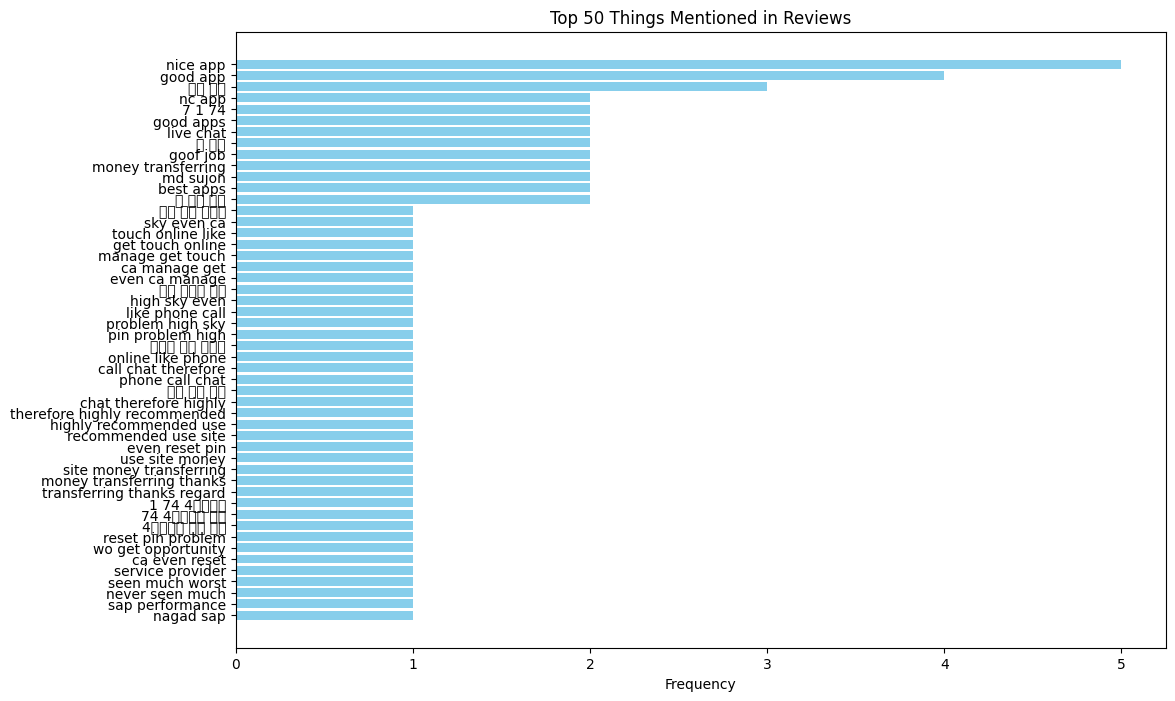

In [ ]:
# Bar Plot of top reviews
top_features = feature_df.head(50)
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 50 Things Mentioned in Reviews')
plt.gca().invert_yaxis()
plt.show()


In [10]:
# Sentiment Analysis
reviews_df['sentiment'] = reviews_df['cleaned_content'].apply(lambda x: TextBlob(x).sentiment.polarity)


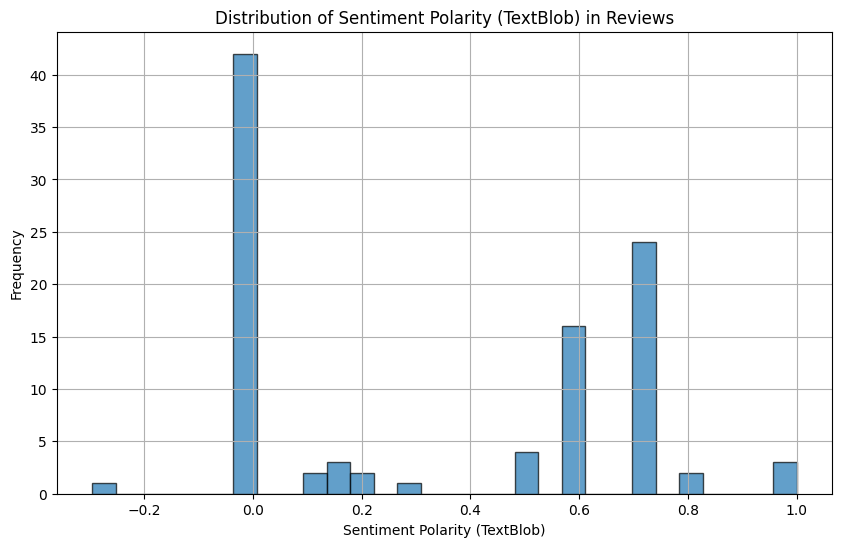

In [11]:
# Plotting Sentiments from TextBlob
plt.figure(figsize=(10, 6))
plt.hist(reviews_df['sentiment'], bins=30, edgecolor='black', alpha=0.7) # Changed 'sentiment_textblob' to 'sentiment'
plt.xlabel('Sentiment Polarity (TextBlob)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity (TextBlob) in Reviews')
plt.grid(True)
plt.show()